In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import time
sns.set() # setting seaborn default for plots

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	sibling(형제자매)  +   spouse(배우자)
- parch:	# of parents / children aboard the Titanic  	parents + children
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

data의 전체적인 정보 출력.
missing data가 얼마나 있는지 확인

참고: df = df.dropna() --> missing이 있는 row를 날린다.

In [2]:
train.info()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1. 정규식으로 문자열 일부 뽑기
```
expand = False --> DataFrame return, True이면 그냥 series

' ([A-Za-z]+)\.' ==> [A-Za-z]는 alphabet을 뜻한다.

([A-Za-z]+) ==> +는 alphabet 반복

\.은 .이 특수문자이므로 '\.'을 해야 '.'을 나타낸다.

' ([A-Za-z]+)\.' ==> 앞에 공백이 하나 있고, 알파벳이 반복된후 .으로 끝나는 부분
```

In [3]:
# train이 새로운 column을 하나 만든다
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=True)
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Lady          1
Mme           1
Ms            1
Sir           1
Countess      1
Capt          1
Jonkheer      1
Don           1
Name: Title, dtype: int64

### 2. Title, Sex을 숫자로 mapping

In [4]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0


### 3. 불필요한 column을 지운다. pandas drop이용. axis=1 --> column을 없앤다.

In [5]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


### 5. 나이가 빠진 data를 Title의 중간값으로 채우기
예: Title별 Age평균
```
train.groupby("Title")["Age"].mean()
```


In [6]:
# Sample Code
df = pd.DataFrame({'Animal' : ['Falcon', 'Falcon','Parrot', 'Parrot'],'Max Speed' : [380., 370., 24., 26.]})
print(df)
print(df.groupby(['Animal']).mean())

df['Max Speed'] = df.groupby(['Animal'])['Max Speed'].transform('mean')
df

   Animal  Max Speed
0  Falcon      380.0
1  Falcon      370.0
2  Parrot       24.0
3  Parrot       26.0
        Max Speed
Animal           
Falcon      375.0
Parrot       25.0


,Animal,Max Speed
0,Falcon,375.0
1,Falcon,375.0
2,Parrot,25.0
3,Parrot,25.0


In [7]:
train.groupby("Title")["Age"].mean()

Title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64

In [8]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,0,30.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,1,14.0,1,0,237736,30.0708,NaN,C,2


### 6.차트 그리기

In [9]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

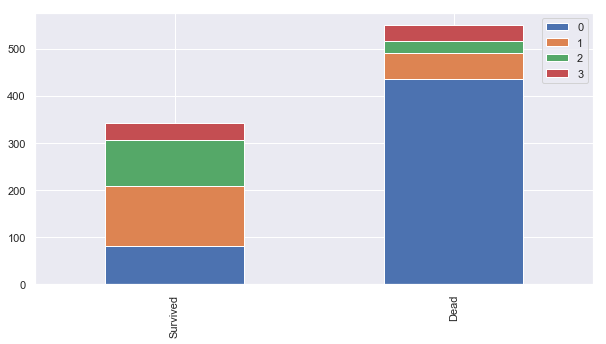

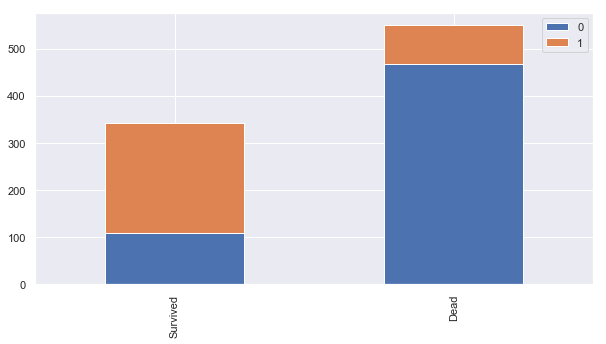

In [10]:
bar_chart('Title')
bar_chart('Sex')

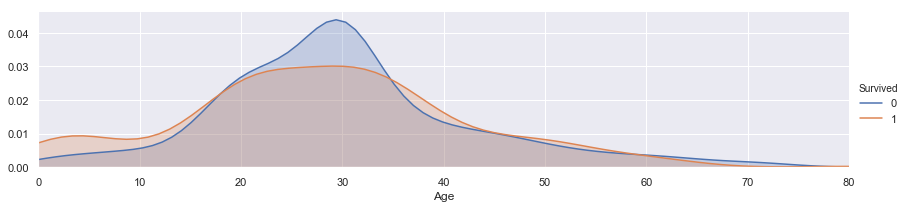

In [11]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
#plt.xlim(0, 40)   # x축 범위
plt.show() 

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


#### 7. Binning
나이 data를 그룹핑하여 category data로 변환

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [13]:
for dataset in [train,test]:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


### 8.좌석 등급별 탑승정보(Embarked)

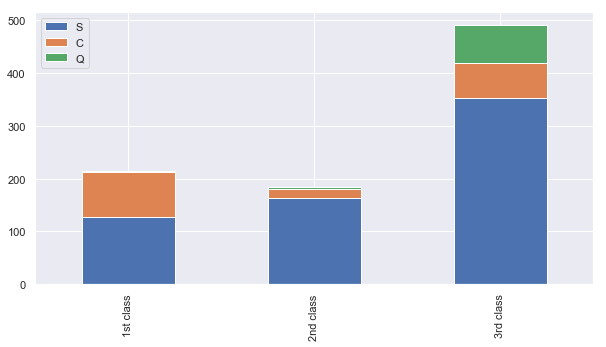

In [14]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

## 9. S에서 가장 많이 탑승했다
Embarked Missing이면 S로 넣어 준다.

In [15]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [16]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

### 10. train data에는 없지만, test data에는 Fare에 missing이 있다.

In [17]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,2.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,3.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,3
8,9,1,3,1,2.0,0,2,347742,11.1333,NaN,0,2
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,2


### 11. 티켓 가격별 생존자 차트

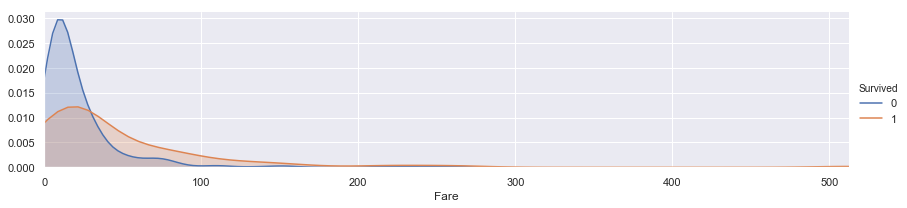

In [18]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

### 12. Fare를 categorical data로 변환

In [19]:
for dataset in [train,test]:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### 13. cabin 객실 정보
객실 정보가 너무 세분화되어 있기 때문에 첫번째 알파벳만 뽑아 사용

In [20]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F33            3
C22 C26        3
F2             3
D              3
F G73          2
D20            2
C78            2
D36            2
C93            2
E44            2
B35            2
C126           2
F4             2
B51 B53 B55    2
D35            2
B20            2
B5             2
E25            2
B49            2
E33            2
E67            2
B28            2
C123           2
B77            2
C92            2
E24            2
              ..
D19            1
D48            1
C128           1
C7             1
C85            1
C104           1
E36            1
C54            1
C101           1
A34            1
E34            1
C87            1
B69            1
E49            1
B79            1
D15            1
E31            1
A20            1
B38            1
C32            1
D7             1
E17            1
C45            1
B50            1
C118           1
E10            1
B37            1
B94           

In [21]:
for dataset in [train,test]:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


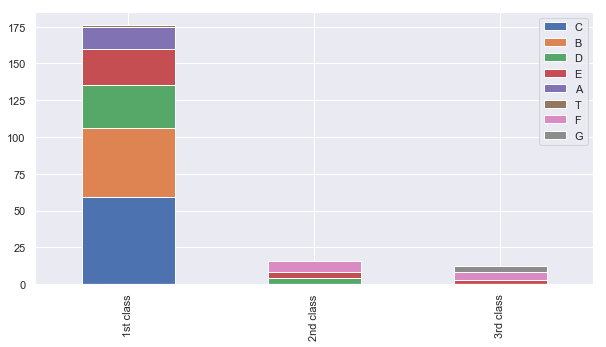

In [22]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

### 14. cabin을 mapping할 때, 숫자의 범위를 너무 넓게 하지 않기 위해, 0, 0.4, ..., 2.8로

In [23]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in [train,test]:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

### 15. cabin data missing 처리를 위해, 티켓등급의 median으로 처리

In [24]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [25]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,2.0,2,0
6,7,0,1,0,3.0,0,0,17463,2.0,1.6,0,0
7,8,0,3,0,0.0,3,1,349909,1.0,2.0,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,2.0,0,2
9,10,1,2,1,0.0,1,0,237736,2.0,1.8,1,2


### 16. Family Size 처리
SibSP, Parch는 가족으로 합친다.

In [26]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

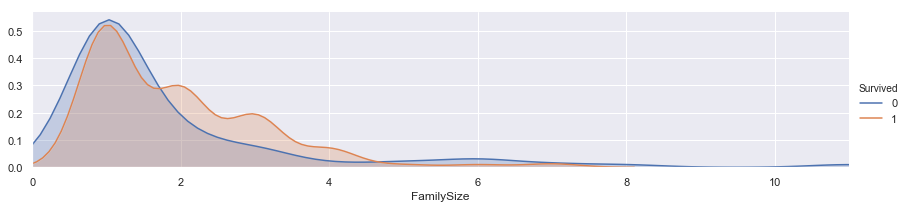

In [27]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [28]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,1.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


### 17. train data 분리

In [29]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

print(train_data.shape, target.shape)

X = train_data.values
Y = target.values
print(X.shape, Y.shape)

(891, 8) (891,)
(891, 8) (891,)


## DATA 작업 종료. Modelling 시작

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import ParameterGrid
import numpy as np

### 18.0 Cross Validation (K-fold)

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 18.1 KNN

In [32]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.81111111 0.78651685 0.85393258 0.82022472 0.80898876 0.82022472
 0.84269663 0.80898876 0.83146067 0.84269663]
82.27


### 18.2 Decision Tree

In [33]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.76666667 0.83146067 0.76404494 0.7752809  0.87640449 0.7752809
 0.82022472 0.82022472 0.74157303 0.78651685]
79.58


### 18.3 Ramdom Forest

In [34]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.77777778 0.84269663 0.85393258 0.75280899 0.86516854 0.79775281
 0.79775281 0.79775281 0.74157303 0.79775281]
80.25


### 18.4 Naive Bayes

In [35]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]
78.78


### 18.5 SVM

In [36]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.82222222 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.83146067 0.84269663 0.84269663 0.86516854]
83.17


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 

In [37]:
import xgboost as xgb

#gbm = xgb.XGBClassifier(max_depth=3, n_estimators=5000, learning_rate=0.0005)
gbm = xgb.XGBClassifier(max_depth=3,n_estimators=5000, learning_rate=0.0005,subsample=0.95)
scoring = 'accuracy'
score = cross_val_score(gbm, train_data, target, cv=k_fold, n_jobs=3, scoring=scoring)
print(score)
print(round(np.mean(score)*100, 2))

[0.83333333 0.78651685 0.83146067 0.83146067 0.83146067 0.80898876
 0.85393258 0.85393258 0.85393258 0.87640449]
83.61


In [45]:
from sklearn.model_selection import ParameterGrid
import time
params =  {
 "learning_rate"    : [0.0005, 0.00025], #, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3,5,7],
 "min_child_weight" : [ 1, 3, 5 ],
 "gamma"            : [ 0.0, 0.1, 0.2 ], # , 0.3, 0.4 ], 
 "colsample_bytree" : [ 0.5 , 0.7, 1.0 ]
}
gbm = xgb.XGBClassifier(max_depth=3,n_estimators=5000, learning_rate=0.0005,subsample=0.95,n_jobs=3)

best_acc = 0.0
n= len(ParameterGrid(params))
print("# of iter: ",n )
i=0
for g in ParameterGrid(params):
    start_time = time.time()
    gbm.set_params(**g)
    gbm.fit(train_data, target,
            eval_set=[(train_data, target) ],eval_metric='auc',
            verbose=False) 
    train_acc = gbm.evals_result()['validation_0']['auc'][-1]  # n_estimators의 제일 마지막
    print("\r----", i, '/' , n)
    print("\rGrid:", g)
    print("train score: ",train_acc )
    print("\rtime:", time.time() - start_time)   
    
    if train_acc > best_acc:
        best_params = g
        best_acc = train_acc
    
    i = i+1
    
print("best params: ", best_params)
print("best acc = ", best_acc)

# of iter:  162
---- 0 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 1}
train score:  0.887286
time: 1.744999885559082
---- 1 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 3}
train score:  0.886391
time: 1.761000156402588
---- 2 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 5}
train score:  0.885414
time: 1.7409999370574951
---- 3 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 1}
train score:  0.901165
time: 2.062999963760376
---- 4 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 3}
train score:  0.895072
time: 2.0360000133514404
---- 5 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 5}
train sco

---- 48 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 1}
train score:  0.893682
time: 2.052000045776367
---- 49 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 3}
train score:  0.888479
time: 2.0230000019073486
---- 50 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 5}
train score:  0.886053
time: 1.9930002689361572
---- 51 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 1}
train score:  0.896175
time: 2.2939999103546143
---- 52 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 3}
train score:  0.889166
time: 2.178999900817871
---- 53 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 5}
train score:

---- 96 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 1}
train score:  0.913639
time: 2.4699997901916504
---- 97 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 3}
train score:  0.898465
time: 2.315000057220459
---- 98 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 5}
train score:  0.892849
time: 2.2330000400543213
---- 99 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 1}
train score:  0.88168
time: 1.7340002059936523
---- 100 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 3}
train score:  0.883323
time: 1.7259998321533203
---- 101 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 5}
train score: 

---- 144 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 1}
train score:  0.888575
time: 1.7799999713897705
---- 145 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 3}
train score:  0.887864
time: 1.7760000228881836
---- 146 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 5}
train score:  0.886884
time: 1.7660000324249268
---- 147 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 1}
train score:  0.919149
time: 2.3459999561309814
---- 148 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 3}
train score:  0.901288
time: 2.2860000133514404
---- 149 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 5}
train scor

In [47]:

params =  {
 "learning_rate"    : [0.0005, 0.00025], #, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3,5,7],
 "min_child_weight" : [ 1, 3, 5 ],
 "gamma"            : [ 0.0, 0.1, 0.2 ], # , 0.3, 0.4 ], 
 "colsample_bytree" : [ 0.5 , 0.7, 1.0 ]
}
gbm = xgb.XGBClassifier(max_depth=3,n_estimators=5000, learning_rate=0.0005,subsample=0.95,n_jobs=3)

best_acc = 0.0
n= len(ParameterGrid(params))
print("# of iter: ",n )
i=0
for g in ParameterGrid(params):
    start_time = time.time()
    gbm.set_params(**g)
    
    score = cross_val_score(gbm, train_data, target, cv=k_fold, n_jobs=3, scoring='accuracy')
    avg_score = round(np.mean(score)*100, 2)
    
    print("\r----", i, '/' , n)
    print("\rGrid:", g)
    print("avg score: ",avg_score )
    print("\rtime:", time.time() - start_time)   
    
    if avg_score > best_acc:
        best_params = g
        best_acc = avg_score
    
    i = i+1
    
print("best params: ", best_params)
print("best acc = ", best_acc)

# of iter:  162
---- 0 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 1}
avg score:  82.6
time: 10.896999835968018
---- 1 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 3}
avg score:  82.27
time: 10.279000043869019
---- 2 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 5}
avg score:  82.16
time: 10.400000095367432
---- 3 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 1}
avg score:  82.38
time: 12.988999843597412
---- 4 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 3}
avg score:  82.72
time: 13.811000108718872
---- 5 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 5}
avg score:  83.5
time: 12.626000

---- 50 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 5}
avg score:  82.49
time: 15.611000061035156
---- 51 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 1}
avg score:  82.16
time: 17.437000036239624
---- 52 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 3}
avg score:  82.72
time: 15.29099988937378
---- 53 / 162
Grid: {'colsample_bytree': 0.5, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 5}
avg score:  82.6
time: 14.891000032424927
---- 54 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 1}
avg score:  82.83
time: 12.644999980926514
---- 55 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.0005, 'max_depth': 3, 'min_child_weight': 3}
avg score:  82.72
time: 14.669000148773

---- 100 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 3}
avg score:  82.72
time: 11.739000082015991
---- 101 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 5}
avg score:  82.49
time: 12.289000034332275
---- 102 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 1}
avg score:  82.27
time: 16.328999996185303
---- 103 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 3}
avg score:  82.38
time: 16.913999795913696
---- 104 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 5, 'min_child_weight': 5}
avg score:  82.49
time: 10.615999937057495
---- 105 / 162
Grid: {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 7, 'min_child_weight': 1}
avg score:  82.27
time: 16.74

---- 149 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 5, 'min_child_weight': 5}
avg score:  82.72
time: 12.994999885559082
---- 150 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 1}
avg score:  82.15
time: 17.525999784469604
---- 151 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 3}
avg score:  82.94
time: 15.53600001335144
---- 152 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.0005, 'max_depth': 7, 'min_child_weight': 5}
avg score:  83.28
time: 13.976999998092651
---- 153 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 1}
avg score:  82.15
time: 10.102999925613403
---- 154 / 162
Grid: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.00025, 'max_depth': 3, 'min_child_weight': 3}
avg score:  82.6
time: 11.62400007

## Test

In [51]:
model = 2

test_data = test.drop("PassengerId", axis=1).copy()
if model == 1:
    clf = SVC()
    clf.fit(train_data, target)
    prediction = clf.predict(test_data)
    
elif model == 2:
    #gbm = xgb.XGBClassifier(max_depth=3, n_estimators=5000, learning_rate=0.0005).fit(train_data, target)
    gbm = xgb.XGBClassifier(max_depth=3,n_estimators=5000, learning_rate=0.0005,subsample=0.9).fit(train_data, target)

    test_data = test.drop("PassengerId", axis=1).copy()
    prediction = gbm.predict(test_data)

In [52]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

In [ ]:
submission.head()